In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

**We will now perform cross-validation on a simulated data set.
(a) Generate a simulated data set as follows:**
> set.seed(1)

> x=rnorm(100)

> y=x-2*x^2+rnorm(100)

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

In [3]:
#使用seed(1)会导致最后的结果成为4次拟合最佳（随机结果），如果需要二次最好可以选择了seed(311)
np.random.seed(1)
x =  np.random.normal(loc = 0.0, scale = 1.0, size = 100)
y = x - 2* x ** 2 + np.random.normal(loc = 0.0, scale = 1.0, size = 100)
data = pd.DataFrame({'x':x,'y':y})

n = 100, p = 2


**(b) Create a scatterplot of X against Y . Comment on what you find.**

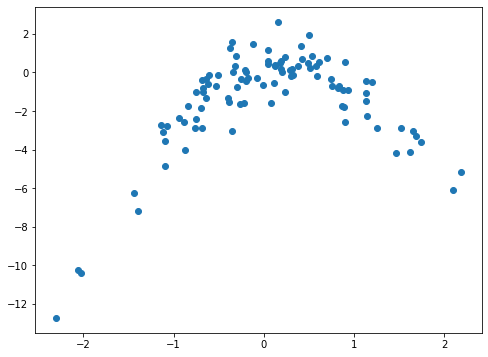

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.show()

**(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
5.4 Exercises 201
i. Y = β 0 + β 1 X + ?
ii. Y = β 0 + β 1 X + β 2 X 2 + ?
iii. Y = β 0 + β 1 X + β 2 X 2 + β 3 X 3 + ?
iv. Y = β 0 + β 1 X + β 2 X 2 + β 3 X 3 + β 4 X 4 + ?.
Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .**

In [5]:
np.random.seed(1)
from sklearn.model_selection import cross_val_score
def patsy_model_poly(factor,degree = 2):
    model_poly = factor
    for i in range(2,degree + 1):
        model_poly = model_poly + '+ I(' + factor +  '**{})'.format(str(i))
    return model_poly
Model_list = []
LOOCV_error_list = []
for degree in range(4):
    model = 'y ~ {}'.format(patsy_model_poly('x',degree + 1))
    Model_list.append(model)
    y,X = patsy.dmatrices(model,data = data.sample(len(y),random_state=1),return_type="dataframe")
    lin_reg = linear_model.LinearRegression()
    LOOCV_error_list.append(-cross_val_score(lin_reg, X, y, cv = len(y), scoring='neg_mean_squared_error').mean())
LOOCV_result = pd.DataFrame(LOOCV_error_list,index = Model_list)
LOOCV_result

,0
y ~ x,6.260764
y ~ x+ I(x**2),0.914290
y ~ x+ I(x**2)+ I(x**3),0.926877
y ~ x+ I(x**2)+ I(x**3)+ I(x**4),0.866912


**(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?**

In [6]:
np.random.seed(2)
Model_list = []
LOOCV_error_list = []
for degree in range(4):
    model = 'y ~ {}'.format(patsy_model_poly('x',degree + 1))
    Model_list.append(model)
    y,X = patsy.dmatrices(model,data = data.sample(len(y),random_state=2),return_type="dataframe")
    lin_reg = linear_model.LinearRegression()
    LOOCV_error_list.append(-cross_val_score(lin_reg, X, y, cv = len(y), scoring='neg_mean_squared_error').mean())
LOOCV_result = pd.DataFrame(LOOCV_error_list,index = Model_list)
LOOCV_result

,0
y ~ x,6.260764
y ~ x+ I(x**2),0.914290
y ~ x+ I(x**2)+ I(x**3),0.926877
y ~ x+ I(x**2)+ I(x**3)+ I(x**4),0.866912


**(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.**

y ~ x+ I(x**2)+ I(x**3)+ I(x**4)最佳，与实际模型相差较大，说明LOOCV有偏差小，但是该结论依据有点依存第一步建模的随机种子。

**(f) Comment on the statistical significance of the coefficient esti-
mates that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?**

In [7]:
for degree in range(4):
    model = 'y ~ {}'.format(patsy_model_poly('x',degree + 1))
    results_smf = smf.ols(model ,data =data).fit()
    print(results_smf.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     9.997
Date:                Tue, 31 Dec 2019   Prob (F-statistic):            0.00209
Time:                        20:09:09   Log-Likelihood:                -228.87
No. Observations:                 100   AIC:                             461.7
Df Residuals:                      98   BIC:                             466.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4131      0.242     -5.849      0.0

从以上结果可见x与I(x ** 2)的p值可信，其他偏大，与结果并不完全一致

**做个实验，与CV=5对比（偏差大，方差小）**

In [8]:
np.random.seed(1)
Model_list = []
CV_error_list = []
for degree in range(4):
    model = 'y ~ {}'.format(patsy_model_poly('x',degree + 1))
    Model_list.append(model)
    y,X = patsy.dmatrices(model,data = data.sample(len(y),random_state=1),return_type="dataframe")
    lin_reg = linear_model.LinearRegression()
    CV_error_list.append(-cross_val_score(lin_reg, X, y, cv = 5, scoring='neg_mean_squared_error').mean())
CV_result = pd.DataFrame(CV_error_list,index = Model_list)
CV_result

,0
y ~ x,7.281696
y ~ x+ I(x**2),0.939079
y ~ x+ I(x**2)+ I(x**3),1.325922
y ~ x+ I(x**2)+ I(x**3)+ I(x**4),1.002657


In [9]:
np.random.seed(2)
Model_list = []
CV_error_list = []
for degree in range(4):
    model = 'y ~ {}'.format(patsy_model_poly('x',degree + 1))
    Model_list.append(model)
    y,X = patsy.dmatrices(model,data = data.sample(len(y),random_state=2),return_type="dataframe")
    lin_reg = linear_model.LinearRegression()
    CV_error_list.append(-cross_val_score(lin_reg, X, y, cv = 10, scoring='neg_mean_squared_error').mean())
CV_result = pd.DataFrame(CV_error_list,index = Model_list)
CV_result

,0
y ~ x,6.551561
y ~ x+ I(x**2),0.940744
y ~ x+ I(x**2)+ I(x**3),0.992164
y ~ x+ I(x**2)+ I(x**3)+ I(x**4),0.880853


从以上比较看出CV = 5相对来说拟合更正确（对该数据来说），但依然可能过拟合。